Objectives

1.	Apply various classification algorithms to the movie reviews dataset
2.	Use k-fold cross validation to identify the parameters that optimize performance (generalization) for each method
3.	Compare the accuracy and explainability of each method



Problem #1
For this homework, you will apply the following classification methods to the movie reviews classification data (available in Blackboard)
1.	KNN (vary the distance measure and K)
2.	Multinomial Naïve Bayes
3.	Random Forest
4.	Gradient Boosted Regression Trees

•	Apply 4-fold cross-validation to the provided training data subset to train your classifiers and identify their optimal parameters. 
•	You need to apply each algorithm to the original data and to the data normalized using at least 2 different methods. For each algorithm identify the best normalization (or no normalization) and justify your choice.

•	After fixing the classifiers’ parameters, apply each method to the provided testing data subset to predict and analyze your results. Compare the accuracy obtained during training (average of the cross-validation folds) to those of the test data and comment on the results (overfitting, underfitting, etc.) 
•	Analyze the results of each method by inspecting the feature importance (if applicable) and few misclassified samples.
•	Select the best algorithm and justify your choice based on accuracy, explainability, time required to train/test, etc.


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,  classification_report

In [2]:
X_train = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/X_train.csv')
X_test = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/X_test.csv')
y_train = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('~/Desktop/Machine_Learning/IMDB dataset/y_test.csv').values.ravel()

In [3]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24999, 1000)
X_test shape: (24999, 1000)
y_train shape: (24999,)
y_test shape: (24999,)


In [4]:
print(X_train.head())

   0.0  1.0  1.0.1  0.0.1  1.0.2  1.0.3  1.0.4  1.0.5  1.0.6  1.0.7  ...  \
0  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
1  0.0  1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    1.0  ...   
2  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
3  0.0  1.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0    0.0  ...   
4  0.0  1.0    1.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0  ...   

   0.0.893  0.0.894  0.0.895  0.0.896  0.0.897  0.0.898  0.0.899  0.0.900  \
0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   0.0.901  0.0.902  
0      0.0      0.0  
1      0.0      0.0  
2      0.0    

In [5]:
print(y_train[:5])

[0. 0. 1. 0. 0.]


In [13]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

KNN

In [14]:
k_values = [1, 3, 5, 7, 9]

In [15]:
all_fold_accuracies = {}  
avg_accuracies = []
execution_times = []


In [16]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    
    start_time = time.time() 
    
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
       
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
       
        knn.fit(X_fold_train, y_fold_train)
        y_pred = knn.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_pred)
        fold_accuracies.append(accuracy) 
    
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)  
    avg_accuracies.append(avg_accuracy)  
    
    elapsed_time = time.time() - start_time  
    execution_times.append(elapsed_time)  
    
    all_fold_accuracies[k] = fold_accuracies 

    
    print(f"KNN with K={k}: Average CV accuracy = {avg_accuracy:.4f}, Time taken = {elapsed_time:.2f} seconds")


KNN with K=1: Average CV accuracy = 0.5949, Time taken = 5.80 seconds
KNN with K=3: Average CV accuracy = 0.6205, Time taken = 6.04 seconds
KNN with K=5: Average CV accuracy = 0.6292, Time taken = 6.33 seconds
KNN with K=7: Average CV accuracy = 0.6352, Time taken = 6.59 seconds
KNN with K=9: Average CV accuracy = 0.6344, Time taken = 6.56 seconds


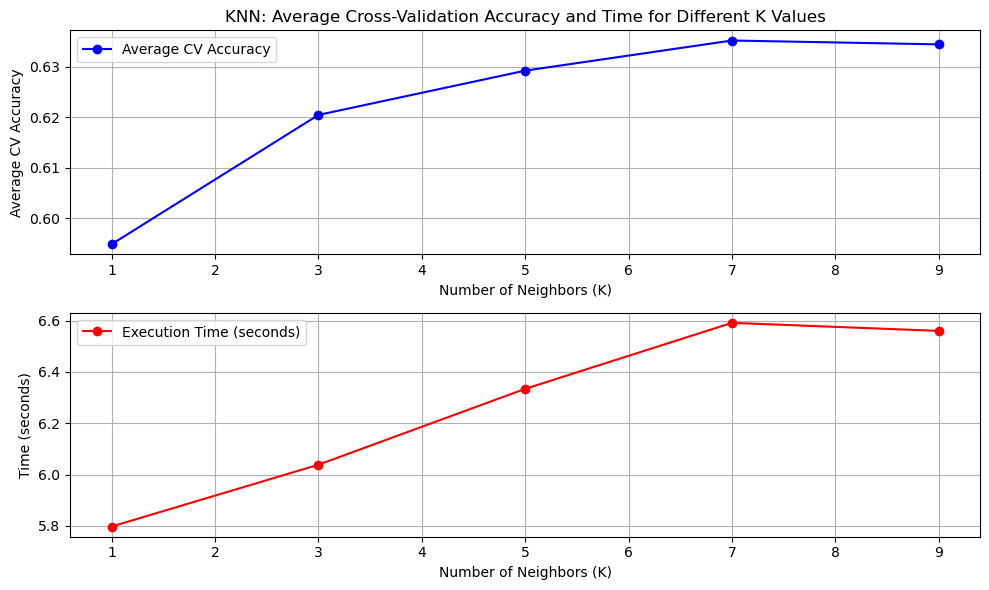

In [18]:
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b', label='Average CV Accuracy')
plt.title('KNN: Average Cross-Validation Accuracy and Time for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average CV Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(k_values, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()






KNN with K=1: Average CV accuracy = 0.5971, Average Training accuracy = 1.0000, Time taken = 31.05 seconds
KNN with K=3: Average CV accuracy = 0.6213, Average Training accuracy = 0.8069, Time taken = 33.76 seconds
KNN with K=5: Average CV accuracy = 0.6333, Average Training accuracy = 0.7605, Time taken = 35.55 seconds
KNN with K=7: Average CV accuracy = 0.6384, Average Training accuracy = 0.7377, Time taken = 34.70 seconds
KNN with K=9: Average CV accuracy = 0.6387, Average Training accuracy = 0.7200, Time taken = 37.55 seconds


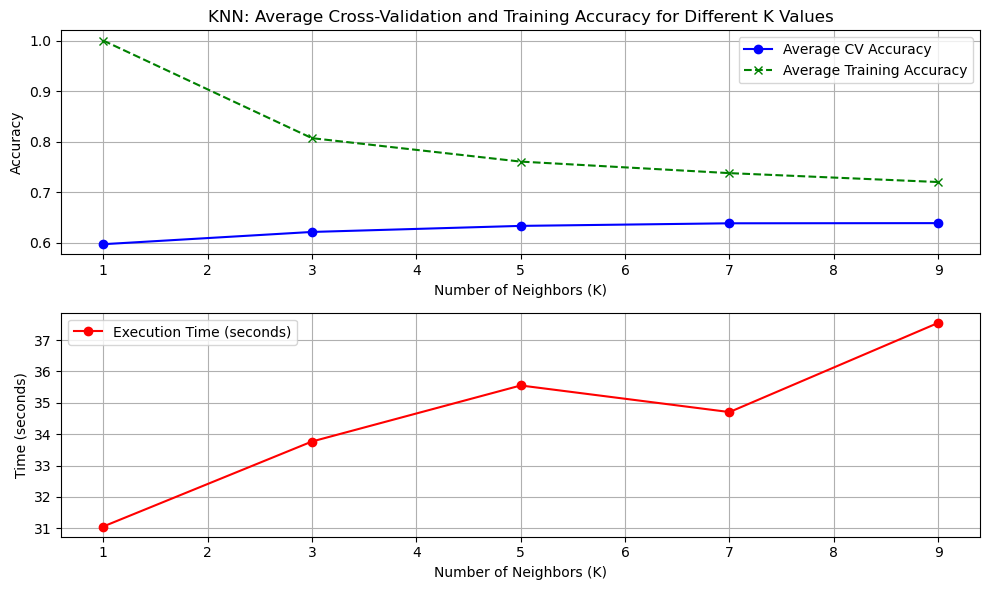

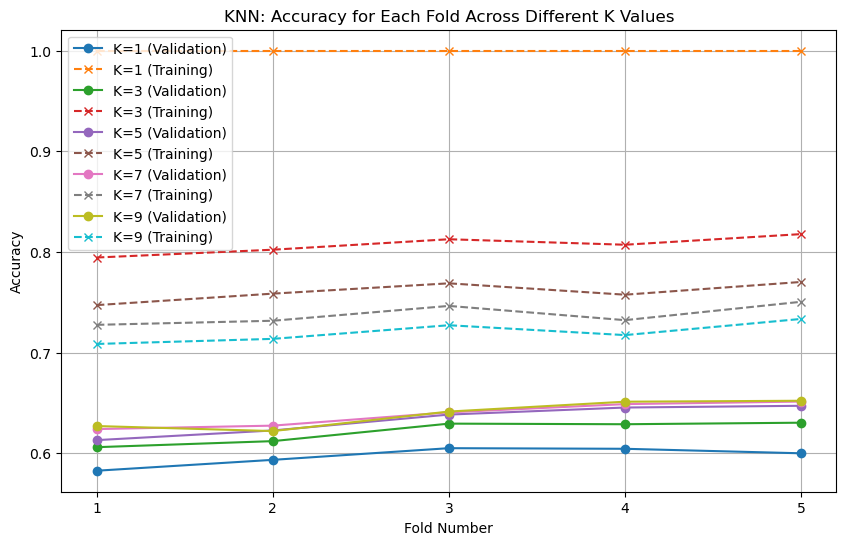

In [12]:
k_values = [1, 3, 5, 7, 9]
all_fold_accuracies = {}  
all_train_accuracies = {}
avg_accuracies = []
avg_train_accuracies = []
execution_times = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_accuracies = []
    fold_train_accuracies = []  
    
    start_time = time.time()  
    
    
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
       
        knn.fit(X_fold_train, y_fold_train)
        
       
        y_val_pred = knn.predict(X_fold_val)
        accuracy = accuracy_score(y_fold_val, y_val_pred)
        fold_accuracies.append(accuracy)  
        
       
        y_train_pred = knn.predict(X_fold_train)
        train_accuracy = accuracy_score(y_fold_train, y_train_pred)
        fold_train_accuracies.append(train_accuracy)  
    
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)  
    avg_train_accuracy = sum(fold_train_accuracies) / len(fold_train_accuracies)  
    avg_accuracies.append(avg_accuracy) 
    avg_train_accuracies.append(avg_train_accuracy)  
    
    elapsed_time = time.time() - start_time  
    execution_times.append(elapsed_time) 

    all_fold_accuracies[k] = fold_accuracies  
    all_train_accuracies[k] = fold_train_accuracies  


    print(f"KNN with K={k}: Average CV accuracy = {avg_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {elapsed_time:.2f} seconds")





plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b', label='Average CV Accuracy')
plt.plot(k_values, avg_train_accuracies, marker='x', linestyle='--', color='g', label='Average Training Accuracy')
plt.title('KNN: Average Cross-Validation and Training Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(k_values, execution_times, marker='o', linestyle='-', color='r', label='Execution Time (seconds)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()




plt.figure(figsize=(10, 6))


for k in k_values:
    plt.plot(range(1, 6), all_fold_accuracies[k], marker='o', linestyle='-', label=f'K={k} (Validation)')
    plt.plot(range(1, 6), all_train_accuracies[k], marker='x', linestyle='--', label=f'K={k} (Training)')

plt.title('KNN: Accuracy for Each Fold Across Different K Values')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))  
plt.grid(True)
plt.legend()
plt.show()


KNN with K=1, Metric=euclidean: Average CV accuracy = 0.5971, Average Training accuracy = 1.0000, Time taken = 30.04 seconds
KNN with K=3, Metric=euclidean: Average CV accuracy = 0.6213, Average Training accuracy = 0.8069, Time taken = 33.21 seconds
KNN with K=5, Metric=euclidean: Average CV accuracy = 0.6333, Average Training accuracy = 0.7605, Time taken = 34.18 seconds
KNN with K=7, Metric=euclidean: Average CV accuracy = 0.6384, Average Training accuracy = 0.7377, Time taken = 33.29 seconds
KNN with K=9, Metric=euclidean: Average CV accuracy = 0.6387, Average Training accuracy = 0.7200, Time taken = 34.18 seconds


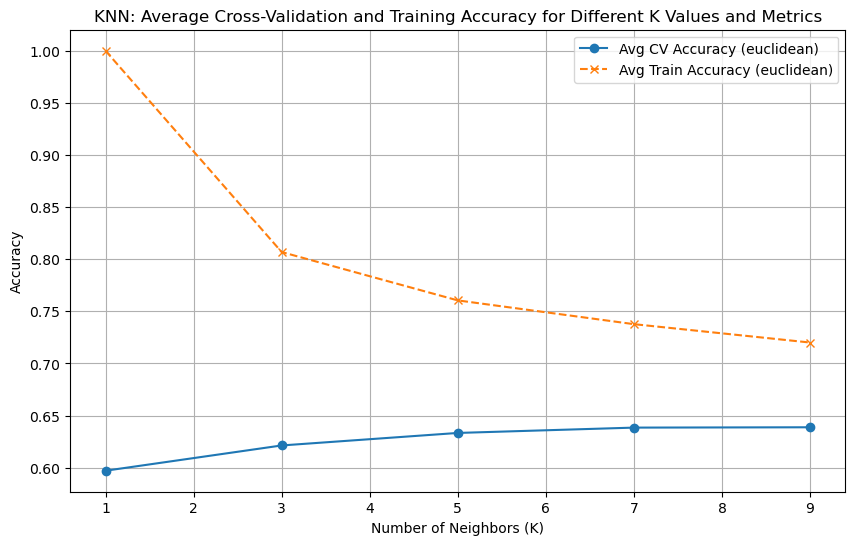

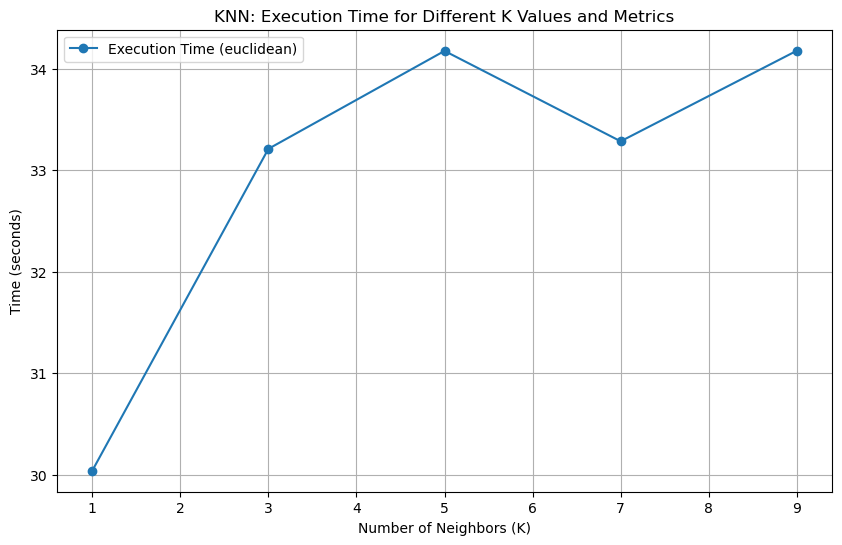

In [20]:
k_values = [1, 3, 5, 7, 9]
metrics = ['euclidean']  
all_results = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for metric in metrics:
    avg_accuracies = []
    avg_train_accuracies = []
    execution_times = []  # To store execution times for each K

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)  # Use all cores
        fold_accuracies = []
        fold_train_accuracies = []

        start_time = time.time()  # Start timing

        for train_index, val_index in kf.split(X_train):
            X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
            y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
            
            knn.fit(X_fold_train, y_fold_train)
            y_val_pred = knn.predict(X_fold_val)
            accuracy = accuracy_score(y_fold_val, y_val_pred)
            fold_accuracies.append(accuracy)
            
            y_train_pred = knn.predict(X_fold_train)
            train_accuracy = accuracy_score(y_fold_train, y_train_pred)
            fold_train_accuracies.append(train_accuracy)
        
        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        avg_train_accuracy = sum(fold_train_accuracies) / len(fold_train_accuracies)
        avg_accuracies.append(avg_accuracy)
        avg_train_accuracies.append(avg_train_accuracy)

        execution_time = time.time() - start_time  # Calculate elapsed time
        execution_times.append(execution_time)  # Store execution time

        print(f"KNN with K={k}, Metric={metric}: Average CV accuracy = {avg_accuracy:.4f}, Average Training accuracy = {avg_train_accuracy:.4f}, Time taken = {execution_time:.2f} seconds")

    all_results[metric] = {
        'avg_accuracies': avg_accuracies,
        'avg_train_accuracies': avg_train_accuracies,
        'execution_times': execution_times  # Store execution times
    }

# Plotting the results
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(k_values, all_results[metric]['avg_accuracies'], marker='o', linestyle='-', label=f'Avg CV Accuracy ({metric})')
    plt.plot(k_values, all_results[metric]['avg_train_accuracies'], marker='x', linestyle='--', label=f'Avg Train Accuracy ({metric})')

plt.title('KNN: Average Cross-Validation and Training Accuracy for Different K Values and Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plotting execution times
plt.figure(figsize=(10, 6))
plt.plot(k_values, all_results[metric]['execution_times'], marker='o', linestyle='-', label=f'Execution Time ({metric})')
plt.title('KNN: Execution Time for Different K Values and Metrics')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.show()